In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from spectral import *
import numpy as np
import PIL
import sympy as sp
from mpmath import *
import matplotlib
import matplotlib.pyplot as plt

In [3]:
def normalize(lst):
    s = sum(lst)
    return map(lambda x: float(x)/s, lst)
def norm(array):
    p1 = array.reshape(-1)
    x1 = normalize(p1)
    y1 = np.array(x1).reshape(-1,10)
    return y1

In [4]:
#img = aviris.open('f970619t01p02_r02_sc05.a.rfl','f970619t01p02_r02.a.spc')
img = aviris.open('hawaii_sc01.raw')

In [5]:
img

	Data Source:   './hawaii_sc01.raw'
	# Rows:            512
	# Samples:         614
	# Bands:           224
	Interleave:        BIP
	Quantization:  16 bits
	Data format:     int16

In [6]:
arr = img.load()

In [7]:
#view = imshow(img, (1,2,200))
#view = imshow(img, (15,200,20))
#view = imshow(img, (158,20,100))
#view = imshow(img, (58,200,150))
#view = imshow(img, (158,20,175))
#view = imshow(img, (158,200,75))

In [8]:
#spectral.settings.WX_GL_DEPTH_SIZE = 16

In [9]:
#view1 = view_cube(arr, bands= [7,7,200])

In [10]:
block = []
for i in range(224):
    data = arr[:40,:40,i].astype(np.float32)*10000 
    block.append(data)
print "process complete"

process complete


In [11]:
corr = []
for i in range(223):
    cor = np.corrcoef(block[i].reshape(-1), block[i+1].reshape(-1))[0][1]
    corr.append(cor)
print "process complete"

process complete


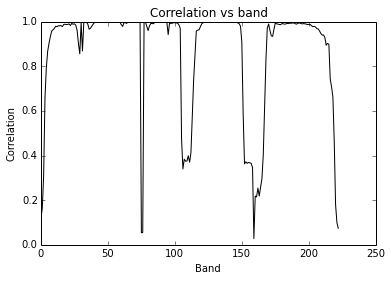

In [12]:
plt.figure(1)
plt.plot(range(0,223),corr, 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()
#Correlation ended

In [13]:
#greedy ordering algorithm
#rblock = [] # reference block, Contains the randome selectd block
#block1 = [] #Contains all the remaining blocks
#Ref = 25  #Reference block number, First block under consideration
#rblock.append(block[Ref])
#for i in range(40):
#    if i != Ref:
#        blocki = block[i]
#        block1.append(blocki)
#print('Process Complete')

In [14]:
#refblock = rblock[0]
#corgoa = []
#for i in range(39):
#    corr2 = np.corrcoef(refblock.reshape(-1), block1[i].reshape(-1))[0][1]
#    corgoa.append(corr2)
#print corgoa
#indexi = corgoa.index(max(corgoa))
#rblock.append(block1[indexi])
#rblock
haha = corr.index(min(corr))
print haha

159


In [15]:
#greedy ordering algorithm
rblock = [] #reference block
block1 = [] #all blocks
block1 = block
rindex = [] #contains all index
ifin = []
ifin1 = []


rindex.append(haha)
rblock.append(block1[haha])

for gh in range(len(block)):
        ifin.append(gh) #ifin will conatin the number od indices
        
for jk in range(224): 
    corgoa = [] #conatins correlation of greedy ordering algorithm
    Ref = rindex[jk] #Ref will contain the last rindex    
    block1.pop(Ref) #Removes that index from the block
    yoyo = ifin.pop(Ref) # saves it to a temp variable yoyo
    ifin1.append(yoyo) #ifin1 will conatin the final rearranged indexes
    for ijk in range(len(block1)):
        corr2 = np.corrcoef(rblock[jk].reshape(-1), block1[ijk].reshape(-1))[0][1] #calculate correlation coefficient with respect to the reference block
        corgoa.append(corr2)
    if len(corgoa) !=0:
        indexi = corgoa.index(max(corgoa)) #indexi will contain the index of maximum correlation w.r.t to the rblock
        rblock.append(block1[indexi]) #add the corresponding block to the rblock
        rindex.append(indexi) 
    del(corgoa)
    del(Ref)
print('Process Complete')

Process Complete


In [16]:
corrfin = []
for i in range(223):
    corfin = np.corrcoef(rblock[i].reshape(-1), rblock[i+1].reshape(-1))[0][1]
    corrfin.append(corfin)
print corrfin

[0.36379315145662811, 0.378812718749658, 0.36962653548246366, 0.38335667774789017, 0.40328380189404756, 0.40115841490912474, 0.4130348678884545, 0.59984497071518705, 0.8442561088833439, 0.95791469365814719, 0.96292301709064687, 0.9756538286195412, 0.98953838697404495, 0.99473326865432798, 0.9967674813271703, 0.99719845240104066, 0.99760704510548281, 0.99765304314636705, 0.99700190850915693, 0.99727812816254935, 0.99731971854371093, 0.99817027294650806, 0.9980351083669865, 0.99823041326100137, 0.99813959763749138, 0.99813498788934063, 0.99807373955863676, 0.99815557526190102, 0.99806025763124073, 0.99749983828863609, 0.99776103750405287, 0.99742138901665056, 0.99771239401073863, 0.99602096990735578, 0.99618264700217463, 0.9966362010683012, 0.99408879316314169, 0.98997965678917599, 0.99659805941760116, 0.97047332223718585, 0.99054912250404958, 0.97962983753630817, 0.961778331647406, 0.99329494817335151, 0.99374859157717588, 0.99379008912746425, 0.99376882398618605, 0.99367015851180129, 0

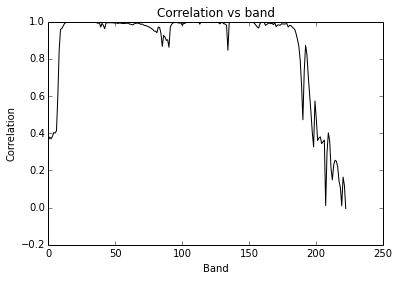

In [17]:
plt.figure(12)
plt.plot(range(0,223),corrfin, 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [18]:
from sklearn.preprocessing import normalize

In [19]:
#normalizing each block
rblockn = []
for q in range(len(rblock)):
    xc = rblock[q]
    xv = normalize(xc)
    rblockn.append(xv)
print('Process Complete')

Process Complete


In [20]:
def zigzag(arr):
    a = arr
    x = [a[0][0],a[0][1],a[1][0],a[2][0],a[1][1],a[0][2],a[0][3],a[1][2],a[2][1],a[3][0],a[4][0],a[3][1],a[2][2],a[1][3],a[0][4],a[1][4],a[2][3],a[3][2],a[4][1],a[4][2],a[3][3],a[2][4],a[3][4],a[4][3],a[4][4]]
    return x

In [21]:
#imagescanning
finlist = []
for i in range(224):
    rblockyo = rblockn[i]
    xx = rblockyo[:5,:5]
    yy = zigzag(xx)
    finlist = finlist + yy

In [22]:
len(finlist)

5600

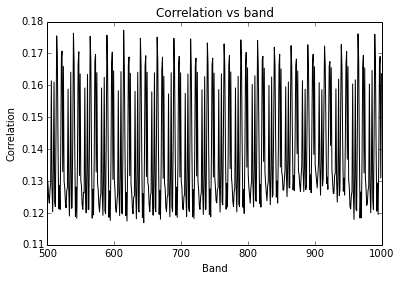

In [23]:
plt.figure(15)
plt.plot(range(500,1000),finlist[500:1000], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [24]:
from audiolazy import lpc

In [25]:
lpcjai = lpc(finlist, order=3)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


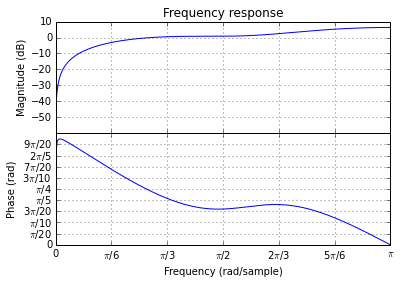

In [39]:
lpcjai = lpc(finlist, order=3).plot().show()

In [26]:
lpcjai

1 - 0.782716 * z^-1 + 0.0385105 * z^-2 - 0.253386 * z^-3

In [27]:
lpcjai.error

0.87319853153242377

In [28]:
lpcjai.numerator

[1, -0.7827161221550512, 0.03851046295500282, -0.25338627489230703]

In [29]:
reslpc = lpcjai(finlist)

In [30]:
reslpc1 = list(reslpc)

In [31]:
len(reslpc1)

5600

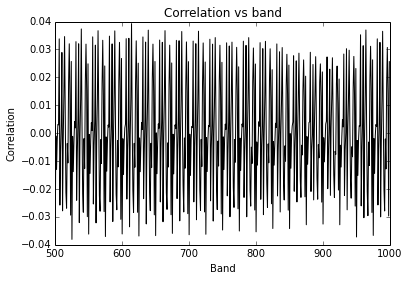

In [32]:
plt.figure(19)
plt.plot(range(500,1000),reslpc1[500:1000], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [33]:
errorframe = []
for ijk in range(5600):
    err = reslpc1[ijk] - finlist[ijk]
    errorframe.append(err)
print 'process complete'

process complete


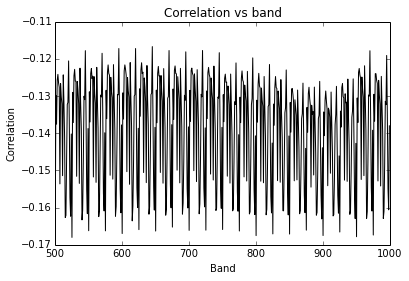

In [34]:
plt.figure(29)
plt.plot(range(500,1000),errorframe[500:1000], 'k')
plt.xlabel('Band')
plt.ylabel('Correlation')
plt.title('Correlation vs band')
plt.show()

In [35]:
import heapq
from collections import defaultdict

In [36]:
def encode(frequency):
    heap = [[weight, [symbol, '']] for symbol, weight in frequency.items()]
    heapq.heapify(heap)
    while len(heap) > 1:
        lo = heapq.heappop(heap)
        hi = heapq.heappop(heap)
        for pair in lo[1:]:
            pair[1] = '0' + pair[1]
        for pair in hi[1:]:
            pair[1] = '1' + pair[1]
        heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])
    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

In [37]:
frequency = defaultdict(int)
for symbol in errorframe:
    frequency[symbol] += 1

huff = encode(frequency)
#print "Symbol".ljust(10) + "Weight".ljust(10) + "Huffman Code"
huffcode = []
for p in huff:
    #print  p[0] , str(frequency[p[0]]).ljust(10) , p[1]
    huffcode.append(p[1])
print "process complete"

process complete


In [38]:
len(huffcode)

5586